<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/CNN_assg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
! pip install augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import Augmentor
p = Augmentor.Pipeline("/content/drive/MyDrive/jumana/jumana")
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/drive/MyDrive/jumana/jumana/output.

Processing <PIL.Image.Image image mode=RGB size=720x1280 at 0x7F63762CE9D0>: 100%|██████████| 100/100 [00:08<00:00, 12.38 Samples/s]


In [8]:
q = Augmentor.Pipeline("/content/drive/MyDrive/sarath face/sarath face")
q.flip_left_right(0.5)
q.black_and_white(0.1)
q.rotate(0.3, 10, 10)
q.skew(0.4, 0.5)
q.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
q.sample(100)

Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/sarath face/sarath face/output.

Processing <PIL.Image.Image image mode=RGB size=3008x6528 at 0x7F63762CE910>: 100%|██████████| 100/100 [03:09<00:00,  1.89s/ Samples]


In [12]:
!rmdir /content/drive/MyDrive/test.data.ipynb_checkpoints

rmdir: failed to remove '/content/drive/MyDrive/test.data.ipynb_checkpoints': No such file or directory


In [19]:
train_dir="/content/drive/MyDrive/train.data"
valid_dir="/content/drive/MyDrive/test.data"


In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
train_data = train_datagen.flow_from_directory(
   train_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode="binary",
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode="binary",
    seed=42
)

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [22]:
model_1=tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu",
                        input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")                                                                               
                                    
])

In [23]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=["accuracy"])

In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)

In [27]:
history=model_1.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks=[callback]
                    )

Epoch 1/100
200/200 [==============================] - 30s 150ms/step - loss: 0.0352 - accuracy: 0.9950 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 2/100
200/200 [==============================] - 30s 149ms/step - loss: 0.0212 - accuracy: 0.9950 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 3/100
200/200 [==============================] - 31s 155ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 4/100
200/200 [==============================] - 30s 150ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000


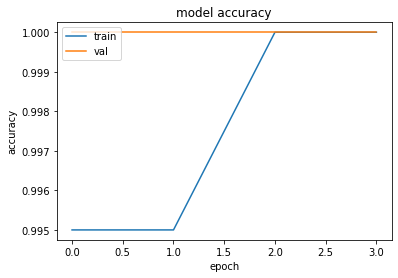

In [28]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

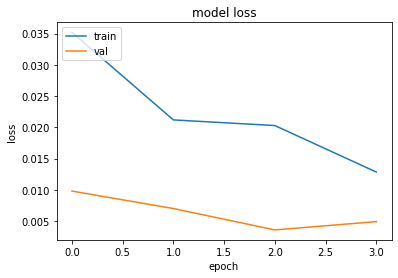

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 4.7 MB/s 


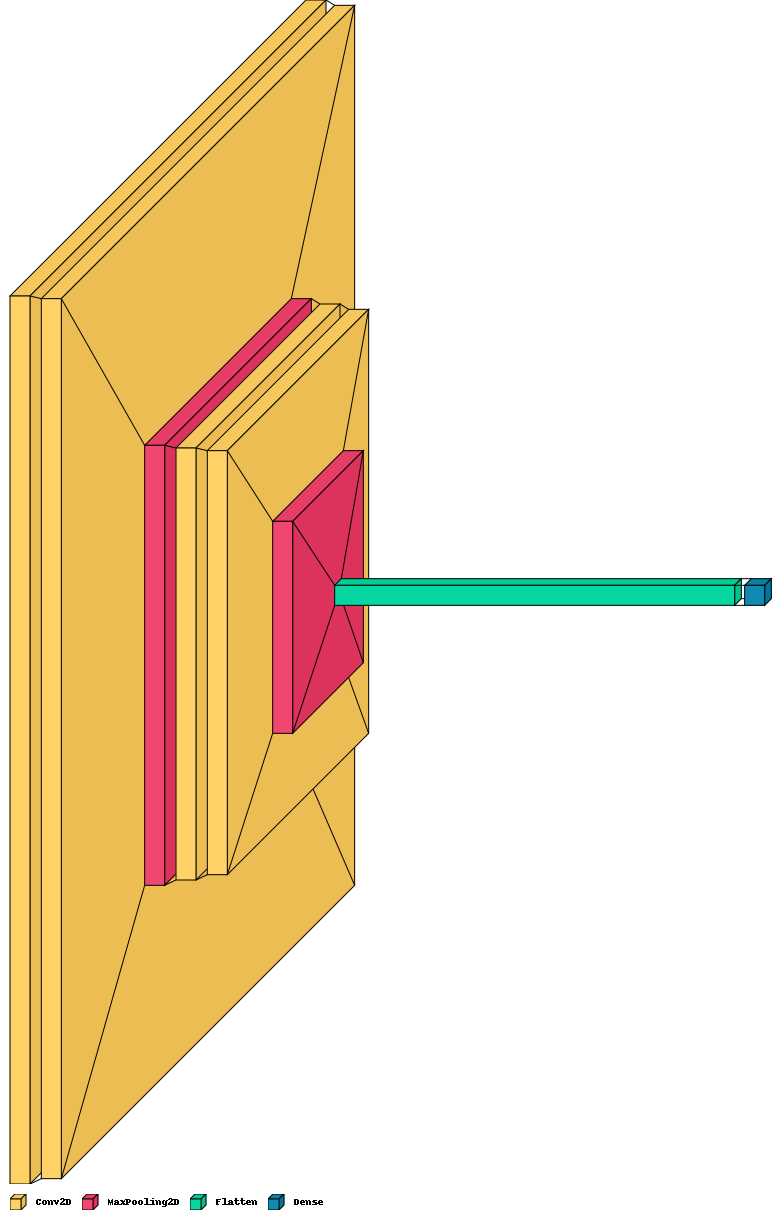

In [31]:
import visualkeras
visualkeras.layered_view(model_1,legend=True)

In [32]:
from tensorflow.keras.preprocessing import image

In [33]:
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  
  print(val)
  #print(val[[0]])
  if val>=0.5:
    plt.xlabel("Jumana",fontsize=30)
  elif val<0.5:
    plt.xlabel("Sarath",fontsize=30) 


[[0.]]


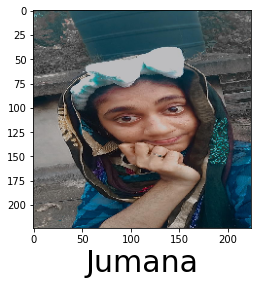

In [ ]:
predictImage("/content/drive/MyDrive/jumana/jumana/out/jumana/jumana/WhatsApp Image 2022-07-18 at 9.15.49 PM.jpeg")

In [34]:
model_2=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")])

In [35]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [37]:
history_2=model_2.fit(train_data,
                      epochs=50,
                      steps_per_epoch=50,
                      validation_data=valid_data,
                       callbacks=[callback]
                      )

Epoch 1/50
50/50 [==============================] - 13s 265ms/step - loss: 0.5838 - accuracy: 0.7600 - val_loss: 0.4284 - val_accuracy: 0.9600
Epoch 2/50
50/50 [==============================] - 15s 311ms/step - loss: 0.4112 - accuracy: 0.8600 - val_loss: 0.2822 - val_accuracy: 0.9600
Epoch 3/50
50/50 [==============================] - 13s 261ms/step - loss: 0.2755 - accuracy: 0.9000 - val_loss: 0.1863 - val_accuracy: 0.9800
Epoch 4/50
50/50 [==============================] - 13s 270ms/step - loss: 0.3592 - accuracy: 0.8800 - val_loss: 0.2633 - val_accuracy: 0.9000
Epoch 5/50
50/50 [==============================] - 14s 291ms/step - loss: 0.2964 - accuracy: 0.9000 - val_loss: 0.2199 - val_accuracy: 0.9200
Epoch 6/50
50/50 [==============================] - 14s 277ms/step - loss: 0.2201 - accuracy: 0.9400 - val_loss: 0.0892 - val_accuracy: 0.9800
Epoch 7/50
50/50 [==============================] - 12s 253ms/step - loss: 0.2247 - accuracy: 0.9200 - val_loss: 0.0609 - val_accuracy: 1.0000

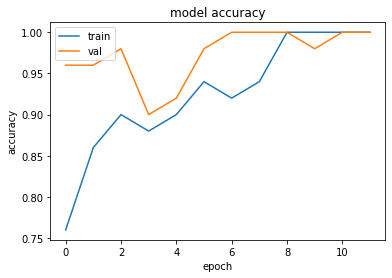

In [38]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

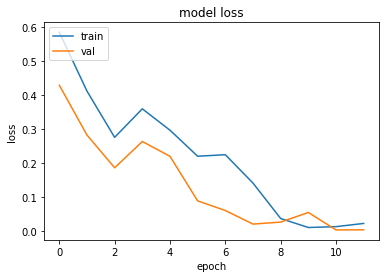

In [39]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [40]:
from tensorflow.keras.preprocessing import image
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_2.predict(X)
  
  print(val)
  #print(val[[0]])
  if val>=0.5:
    plt.xlabel("archa",fontsize=30)
  elif val<0.5:
    plt.xlabel("sarath",fontsize=30)

[[0.]]


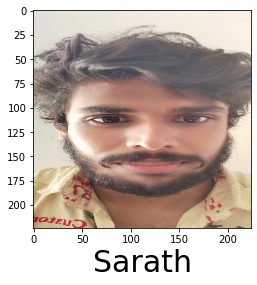

In [ ]:
predictImage("/content/drive/MyDrive/sarath face/sarath face/IMG_20220715_150903.jpg")